# Experiment Summary - FL (14.08 20:00)

- *Normalization*: Z-score normalization performed per bin
- *Devices*: 18
- *Workers*: 12
- *Participants*: 11
- *Epochs*: 12 epochs for each source
- *Input Vector*: 70 x 1
- *CNN Layers*: 3 layers with 64 filters in the first two layers and 32 filters in the last layer
- *Max Pooling*: Applied twice with a size of 2 x 1
- *Kernel Size*: 5 x 1 x 1
- *Flatten*: Applied after CNN layers before the fully connected layers
- *Fully Connected Layers*: 256, 128, 64, 32, 16, 9
- *Activation Function (before the last layer)*: Tanh
- *Last Layer Type*: Probabilistic with softmax function
- *Loss Method*: Cross-Entropy (CE)
- *Learning Rate*: 0.00001
- *Regularization*: L2 applied
- *Optimizer*: SGD
- *FedServer*: ws 

*Training Phases*:
- *Phase 1*: Participants 1-6
- *Phase 2*: Participants 7-11

*Prediction Phases*: 
- *Phase 1*: Participants 1-6
- *Phase 2*: Participants 7-11


In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 
import json
import os

In [2]:
API = ApiServer()

# Experiment Initialization

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_10w_14d_8r_3s_10c_synt.json
1.	dc_12w_12c_13d_4s_4r_tiles_rr.json
2.	dc_5d_4c_4s_4r_12w.json
3.	dc_AEC_1d_2c_1s_4r_4w.json
4.	dc_EEG_18d_12c_6s_10r_12w_CE.json
5.	dc_EEG_18d_12c_6s_10r_12w_FL.json
6.	dc_EEG_18d_12c_6s_10r_12w_MSE.json
7.	dc_EEG_18d_9c_3s_5r_9w_RR.json
8.	dc_EEG_1d_1c_3s_2r_3w_RR.json
9.	dc_EEG_1d_2c_1s_4r_2w.json
10.	dc_EEG_1d_2c_1s_4r_4w.json
11.	dc_EEG_3d_1c_1s_1r_1w.json
12.	dc_EEG_4d_3c_3s_2r_3w.json
13.	dc_EEG_8d_1c_3s_2r_3w_RR.json
14.	dc_EEG_8d_3c_3s_2r_3w.json
15.	dc_EEG_8d_3c_3s_2r_3w_RR.json
16.	dc_EEG_8d_3c_3s_2r_3w_demo_RR.json
17.	dc_EEG_8d_3c_3s_5r_3w_RR.json
18.	dc_EEG_8d_8c_3s_5r_8w_RR.json
19.	dc_FedTorchTest_5d_2s_2r_4c_4w.json
20.	dc_dist_14d.json
21.	dc_dist_2d_3c_2s_3r_6w.json
22.	dc_fed_dist_14d.json
23.	dc_fed_dist_2d_3c_2s_3r_6w.json
24.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
25.	dc_mnist_13d_12w_4r_3s_3tokens.json
26.	dc_mnist_4w_5d_4r_4s_rr.json
27.	dc_synt_8d_8w_2c_4s_4r.json
28.	dc_sy

In [4]:
dc = 5
conn = 32
exp = 23
API.setJsons(dc , conn , exp)

In [5]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [6]:
exp_name = "EEG_Emotion_18Devices_11Persons_FL"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-08-14 21:39:12,841] 
Network components:
                 Receiver's Address: http://10.0.0.30:8901
                 Frequency: 5 [batches/sec]
                 Batchsize: 10 [samples]
                 devicesIp: ['10.0.0.30', '10.0.0.8', '10.0.0.12', '10.0.0.10', '10.0.0.32', '10.0.0.33', '10.0.0.34', '10.0.0.35', '10.0.0.47', '10.0.0.48', '10.0.0.49', '10.0.0.50', '10.0.0.51', '10.0.0.52', '10.0.0.53', '10.0.0.54', '10.0.0.55', '10.0.0.56']
                 mainServerIp: 10.0.0.30
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.30
                 apiServerPort: 8901
                 Clients: ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'cs']
                 Workers: ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 'w11', 'ws']
                 Sources: ['s1', 's2', 's3', 's4', 's5', 's6']
                 Routers: ['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'rms']
[INFO][2024-08-14 21:39:12,842] 

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-08-14 21:39:14,956] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


# Connection Map:

Note: you may need to restart the kernel to use updated packages.
Connections:  [('rms', ['mainServer', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']), ('r1', ['c1', 'c2', 'r2']), ('r2', ['c3', 'c4', 'r3']), ('r3', ['c5', 'c6', 'r4']), ('r4', ['c7', 'c8', 'r5']), ('r5', ['c9', 'c10', 'r6']), ('r6', ['c11', 'cs', 'r7']), ('r7', ['s1', 's2', 'r8', 'r4', 'r2', 'r5', 'r3', 'r1']), ('r8', ['s3', 's4', 'r9', 'r3', 'r4', 'r1', 'r2']), ('r9', ['s5', 's6', 'r3', 'r5', 'r1', 'r6', 'r2', 'r4'])]
Routers:  ['rms', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
Workers:  ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 'w11', 'ws']
Adding edge (rms , mainServer) to graph
Adding edge (rms , r1) to graph
Adding edge (rms , r2) to graph
Adding edge (rms , r3) to graph
Adding edge (rms , r4) to graph
Adding edge (rms , r5) to graph
Adding edge (rms , r6) to graph
Adding edge (rms , r7) to graph
Adding edge (rms , r8) to graph
Adding edge (rms , r9) to graph
Adding edge (r1 ,

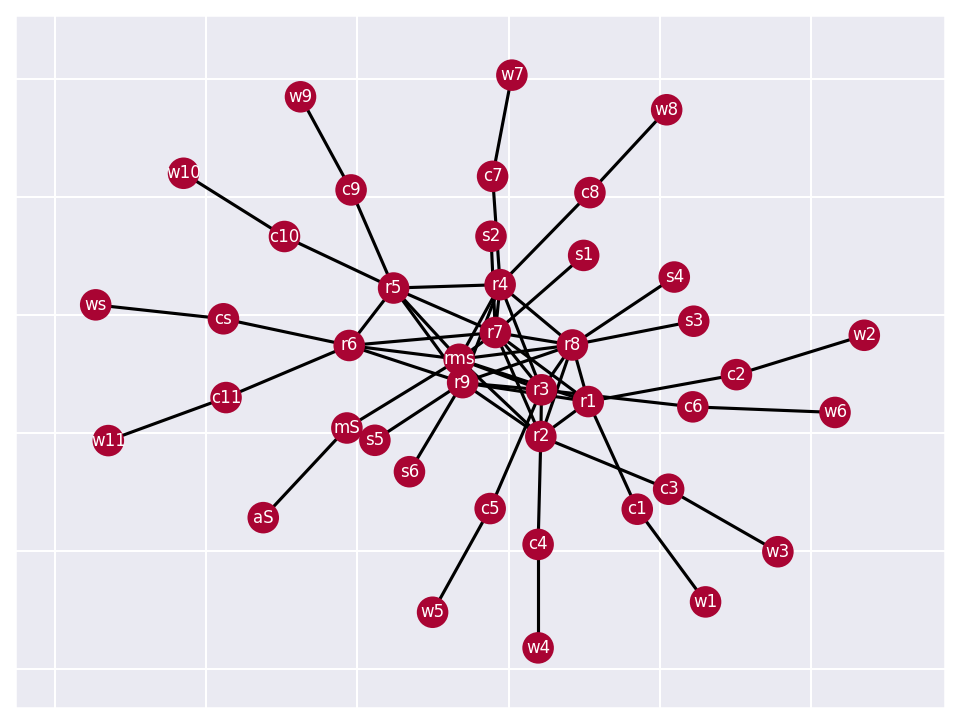

In [7]:
%pip install networkx pygraphviz
import networkx as nx
def visualize_nerlnet_graph(api_server_inst,  connections : dict , components): # connections is a dictionary with keys as routers and values as lists of their neighbors
    print("Connections: " , list(connections.items()))
    routers = list(connections.keys())
    print("Routers: " , routers)
    workers = list(components.map_worker_to_client.keys())
    print("Workers: " , workers)
    graph = nx.Graph()
    nodes = routers + components.sources + components.clients + workers + [API_SERVER_STR , MAIN_SERVER_STR]
    edges = [] # list of tuples
    for router , neighbors in list(connections.items()):
        for neighbor in neighbors:
            if (router,neighbor) not in edges:
                print(f"Adding edge ({router} , {neighbor}) to graph")
                edges.append((router , neighbor))
    edges.append((API_SERVER_STR , MAIN_SERVER_STR)) # Always connected
    for worker in workers:
        edges.append((worker , components.map_worker_to_client[worker]))
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    
    my_labels = {'mainServer': 'mS' , 'apiServer': 'aS'}
    nx.relabel_nodes(graph, my_labels , copy=False)
    
    default_colors = {node:'#A90433' for node in graph.nodes()}
    node_colors = {node:default_colors[node] for node in graph.nodes()}
    nx.set_node_attributes(graph, node_colors, 'color')
    colors = nx.get_node_attributes(graph, 'color').values()

    pos = nx.nx_agraph.graphviz_layout(graph)
    angle = 100
    
    plt.figure(figsize=(8,6),dpi=150)
    nx.draw_networkx(graph, pos, with_labels=True, node_color=colors , node_size=200, font_size=8, font_color='white' , edge_color='black' , width=1.5)
    plt.show()
visualize_nerlnet_graph(API , API.json_dir_parser.json_from_path(conn_path)['connectionsMap'] , globe.components)

In [8]:
API.send_jsons_to_devices()

[INFO][2024-08-14 21:39:18,342] Sending distributed configurations to devices is completed


## Training phase 1:

In [9]:
API.run_current_experiment_phase()

[INFO][2024-08-14 21:39:18,348] Experiment phase: training_phase1 of type training starts running...
[INFO][2024-08-14 21:39:18,349] Sending data to sources
[INFO][2024-08-14 21:40:28,888] Data is ready in sources
[INFO][2024-08-14 21:40:28,889] Phase training requested from Main Server


KeyboardInterrupt: 

In [ ]:
stats_train1 = API.get_experiment_flow(exp_name).generate_stats()

In [ ]:
df_loss1 = stats_train1.get_loss_ts(plot=True, smoothing = True, log_plot = True)

In [ ]:
directory = '/home/nerlnet/workspace/NErlNet/experiments_results/FL300'
os.makedirs(directory, exist_ok=True)
filename = f'train1_loss.csv'
filepath = os.path.join(directory, filename)
df_loss1.to_csv(filepath)

In [ ]:
recieved_train_1 = stats_train1.get_recieved_batches()
missed_train_1 = stats_train1.get_missed_batches()
stats_train1.plot_batches_status(plot=True)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "recieved_batches_train_1.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(recieved_train_1, json_file)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "missed_batches_train_1.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(missed_train_1, json_file)

## Training phase 2:

In [ ]:
API.next_experiment_phase()
API.run_current_experiment_phase()

In [ ]:
stats_train2 = API.get_experiment_flow(exp_name).generate_stats()

In [ ]:
df_loss2 = stats_train2.get_loss_ts(plot=True, smoothing = True, log_plot = True)

In [ ]:
directory = '/home/nerlnet/workspace/NErlNet/experiments_results/FL300'
os.makedirs(directory, exist_ok=True)
filename = f'train2_loss.csv'
filepath = os.path.join(directory, filename)
df_loss2.to_csv(filepath)

In [ ]:
recieved_train_2 = stats_train2.get_recieved_batches()
missed_train_2 = stats_train2.get_missed_batches()
stats_train2.plot_batches_status(plot=True)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "recieved_batches_train_2.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(recieved_train_2, json_file)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "missed_batches_train_2.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(missed_train_2, json_file)

# <span style="color:red;"> *Score Discretization*: </span> Classes are discretized into 3 slots: 1-3, 4-6, 7-9

## Predictaion phase 1:

In [ ]:
API.next_experiment_phase()
API.run_current_experiment_phase()

In [ ]:
stats_pred1 = API.get_experiment_flow(exp_name).generate_stats()

In [ ]:
recieved_predict_1 = stats_pred1.get_recieved_batches()
missed_predict_1 = stats_pred1.get_missed_batches()
stats_pred1.plot_batches_status(plot=True)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "recieved_predict_1.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(recieved_predict_1, json_file)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "missed_predict_1.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(missed_predict_1, json_file)

In [ ]:
conf_source1 , conf_mats1 = stats_pred1.get_confusion_matrices_eeg(plot=True)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "conf_mats1.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(conf_mats1, json_file)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "conf_source1.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(conf_source1, json_file)

In [ ]:
model_performence1 = stats_pred1.get_model_performence_stats(conf_mats1)

In [ ]:
directory = '/home/nerlnet/workspace/NErlNet/experiments_results/FL300'
os.makedirs(directory, exist_ok=True)
filename = f'predict_performence1.csv'
filepath = os.path.join(directory, filename)
model_performence1.to_csv(filepath)

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence1.sort_values('Worker') , x='Worker' , y='F1',hue='Class')
plt.title("Worker - F1 Score")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence1.sort_values('Worker') , x='Worker' , y='Accuracy',hue='Class')
plt.title("Worker - Accuracy")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence1.sort_values('Worker') , x='Worker' , y='Precision',hue='Class')
plt.title("Worker - Precision")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence1.sort_values('Worker') , x='Worker' , y='Recall',hue='Class')
plt.title("Worker - Recall")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()

## Predictaion phase 2:

In [ ]:
API.next_experiment_phase()
API.run_current_experiment_phase()

In [ ]:
stats_pred2 = API.get_experiment_flow(exp_name).generate_stats()

In [ ]:
recieved_predict_2 = stats_pred2.get_recieved_batches()
missed_predict_2 = stats_pred2.get_missed_batches()
stats_pred2.plot_batches_status(plot=True)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "recieved_predict_2.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(recieved_predict_2, json_file)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "missed_predict_2.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(missed_predict_2, json_file)

In [ ]:
conf_source2 , conf_mats2 = stats_pred2.get_confusion_matrices_eeg(plot=True)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "conf_mats2.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(conf_mats2, json_file)

In [ ]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/FL300"  
file_name = "conf_source2.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(conf_source2, json_file)

In [ ]:
model_performence2 = stats_pred2.get_model_performence_stats(conf_mats2)

In [ ]:
directory = '/home/nerlnet/workspace/NErlNet/experiments_results/FL300'
os.makedirs(directory, exist_ok=True)
filename = f'predict_performence2.csv'
filepath = os.path.join(directory, filename)
model_performence2.to_csv(filepath)

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=model_preformance2.sort_values('Worker') , x='Worker' , y='F1',hue='Class')
plt.title("Worker - F1 Score")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_preformance2.sort_values('Worker') , x='Worker' , y='Accuracy',hue='Class')
plt.title("Worker - Accuracy")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_preformance2.sort_values('Worker') , x='Worker' , y='Precision',hue='Class')
plt.title("Worker - Precision")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence2.sort_values('Worker') , x='Worker' , y='Recall',hue='Class')
plt.title("Worker - Recall")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()